In [40]:
import yfinance as yf

In [41]:
# use the Ticker module to access ticker data
msft = yf.Ticker("MSFT")

In [42]:
# get stock info
msft.info  # Données historiques sur 1 an

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [43]:
# access a specific attribute from the dictionary
msft.info["trailingPegRatio"]

2.2605

In [44]:
# download daily stock price data by passing in specified ticker and date range
from datetime import datetime
today_date = datetime.today().strftime('%Y-%m-%d')
today_date

'2024-10-10'

In [45]:
data = yf.download("MSFT", start="2024-03-03", end=today_date)

[*********************100%%**********************]  1 of 1 completed


In [46]:
# view the first few rows.
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,413.440002,417.350006,412.320007,414.920013,413.427795,17596000
2024-03-05,413.959991,414.250000,400.640015,402.649994,401.201904,26919200
2024-03-06,402.970001,405.160004,398.390015,402.089996,400.643921,22344100
2024-03-07,406.119995,409.779999,402.239990,409.140015,407.668579,18718500
2024-03-08,407.959991,410.420013,404.329987,406.220001,404.759064,17971700


In [47]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-03,417.630005,419.549988,414.290009,416.540009,416.540009,13686400
2024-10-04,418.239990,419.750000,414.970001,416.059998,416.059998,19169700
2024-10-07,416.000000,417.109985,409.000000,409.540009,409.540009,20919800
2024-10-08,410.899994,415.660004,408.170013,414.709991,414.709991,19229300
2024-10-09,415.859985,420.380005,414.299988,417.459991,417.459991,14876300


In [48]:
# check data dimension/size
data.shape

(153, 6)

In [49]:
# plot closing price as a time series chart
import plotly.graph_objects as go

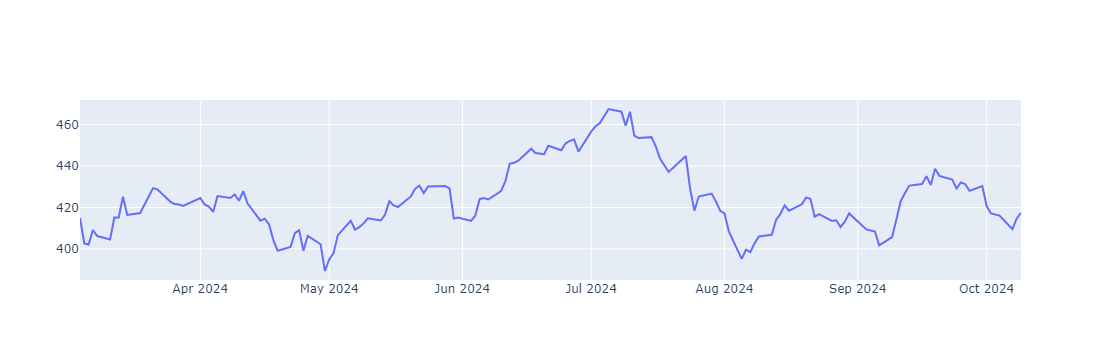

In [50]:
fig = go.Figure(data=go.Scatter(x=data.index,y=data['Close'], mode='lines'))
fig.show()

In [51]:
# overlay the trading volume
from plotly.subplots import make_subplots

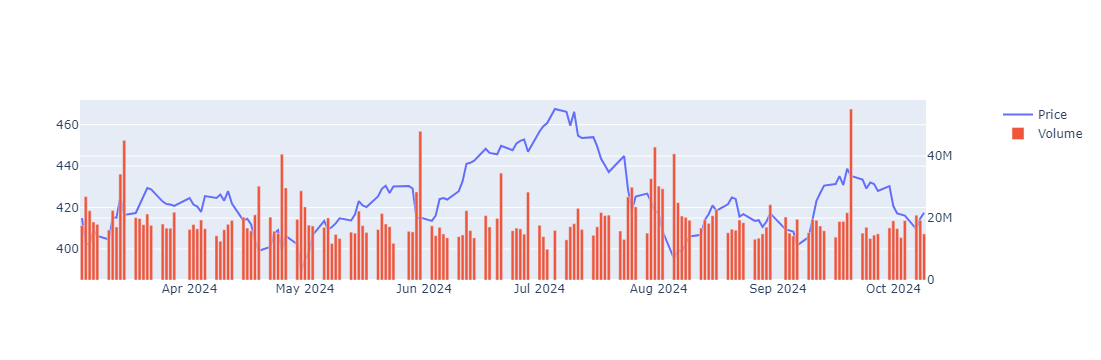

In [52]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Price'), secondary_y=False)
fig2.add_trace(go.Bar(x=data.index, y=data['Volume'], name='Volume'), secondary_y=True)
fig2.show()

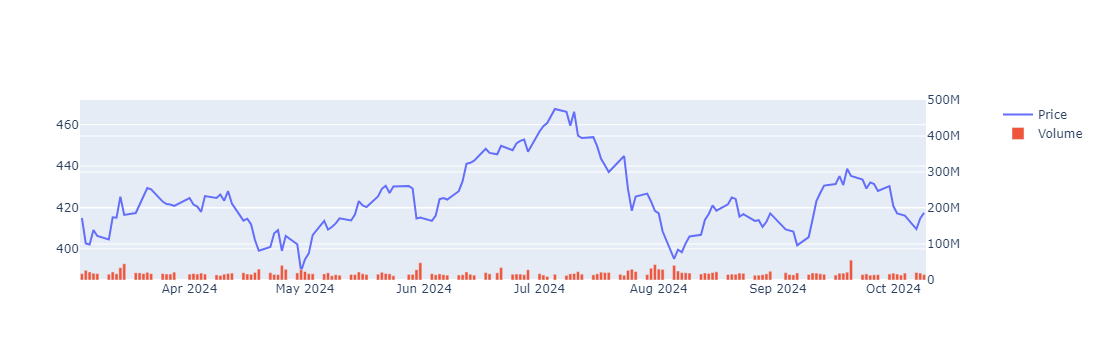

In [53]:
# rescale volume
fig2.update_yaxes(range=[0,500000000],secondary_y=True)
fig2.update_yaxes(visible=True, secondary_y=True)
fig2

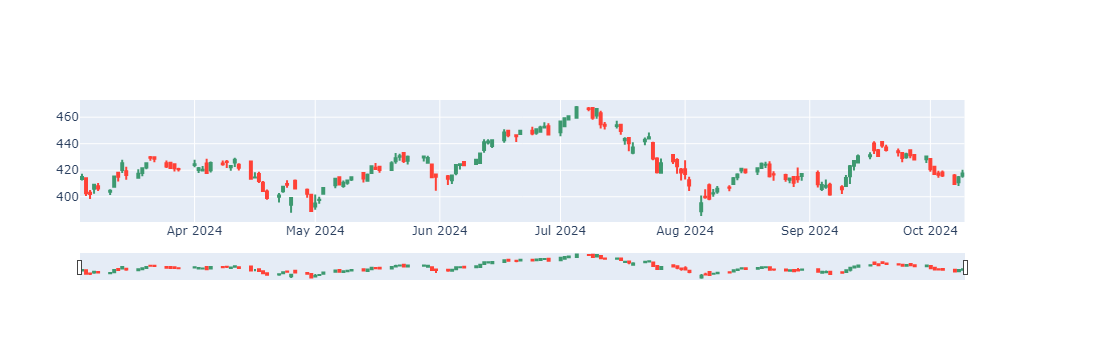

In [57]:
# switch to candlestick chart
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=data.index,
 open=data['Open'],
 high=data['High'],
 low=data['Low'],
 close=data['Close'],
 ))
fig3

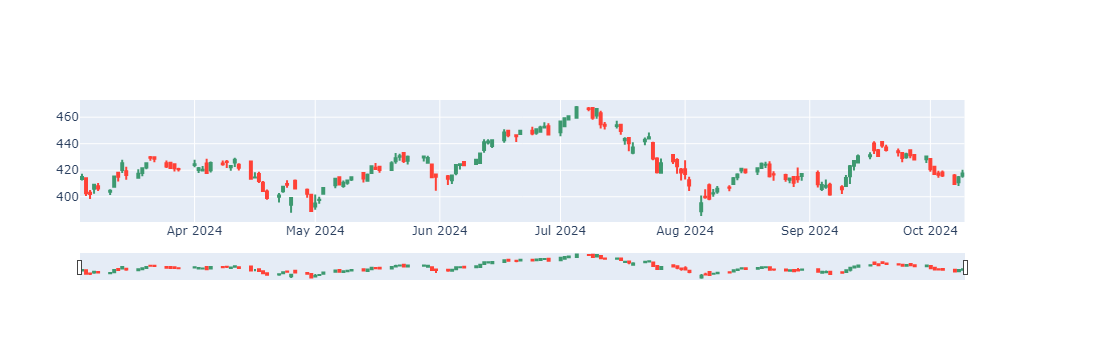

In [59]:
fig3.show()